In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive')
data_path =  r'./drive/My Drive/creditcard.csv'
df = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
creditcard_df = pd.read_csv(data_path)

#**Dataset Description**
**Details**:-
The dataset comprises credit card transactions conducted by European cardholders in September 2013. This dataset comprises transactions that took place during a span of two days, with a total of 492 instances of fraud out of a total of 284,807 transactions.

The dataset comprises numerical input variables that have undergone a Principal Component Analysis (PCA) transformation. Some of the original characteristics are distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, and online_order, which are transformed into variables using PCA. The principle components derived with PCA are denoted as V1, V2,... V28. The only characteristics that have not undergone PCA transformation are 'Time' and 'Amount'. Characteristic In the dataset, the variable 'Time' represents the duration in seconds between each transaction and the initial transaction. The 'Amount' feature represents the transaction amount and can be utilized for example-dependent cost-sensitive learning. Characteristic The response variable, denoted as 'Class', assumes a value of 1 when fraud is present and 0 when it is not.

The dataset exhibits a significant imbalance, with the positive class (defined as frauds) representing a mere 0.172% of the total transactions. There are total 284,807 records and 31 fields.

To solve this unbalanced issue we will implement **SMOTE** algorithm to make the transaction baised. Dataset contains numerical input variables which are the result of a PCA transformation. In the original dataset we

**Source** - https://data.world/raghu543/credit-card-fraud-data

**Solving method**:-
The given problem statement is comes under binary classification
We have to solve problem using different machine learning algorithm as well as deep learning algorithms

**Limitations** - Due to confidentiality issues, the initial characteristics and additional contextual details of the data are converted into major components features V1, V2,... V28 using PCA.


In [36]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [37]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Removing all the null values from the dataset and replacing those values with mean value of the column.

In [38]:
for column in creditcard_df.columns:
    if creditcard_df[column].isna().sum() > 0:
        mean_value = creditcard_df[column].mean()
        creditcard_df[column].fillna(mean_value, inplace=True)

In [39]:
creditcard_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [40]:
def plot_heatmap_of_correlation(df):
    corr = df.corr()
    plt.figure(figsize=(18, 10))
    heat = sns.heatmap(data=corr, annot=True)
    plt.title('Heatmap of Correlation')
    plt.show()

def plot_fraud_transaction_histogram(df):
    fraud = df[df['class'] == 1]
    plt.figure(figsize=(8, 6))
    sns.histplot(data=fraud, x='Amount', bins=65, kde=True)
    plt.title("Distribution of Fraud Transactions")
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

def plot_real_transaction_histogram(df):
    real = df[df['class'] == 0]
    plt.figure(figsize=(8, 6))
    sns.histplot(data=real, x='Amount', bins=65, kde=True)
    plt.title("Distribution of Real Transactions")
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

def plot_amount_distribution_for_transactions(df):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y='Amount', data=df)
    plt.title('Amount Distribution for Fraud and Real Transactions')
    plt.show()

def plot_transaction_time_distribution(df):
    plt.figure(figsize=(6, 4))
    plt.title('Distribution of Transactions with Respect to Time', fontsize=14)
    sns.distplot(df['Time'], bins=120)
    plt.show()

def plot_transaction_counts_by_hour(df):
    plt.figure(figsize=(10, 6))
    df['Hour'] = df['Time'] // 3600
    plt.title('Transaction Counts by Hour', fontsize=14)
    sns.countplot(x='Hour', hue='class', data=df)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)
    plt.show()

def plot_transaction_counts_by_day(df):
    plt.figure(figsize=(10, 6))
    df['Day'] = 1
    df.loc[df['Time'] >= 25*3600, 'Day'] = 2
    plt.title('Transaction Counts by Day', fontsize=14)
    sns.countplot(x='Day', hue='class', data=df)
    plt.xlabel('Day')
    plt.ylabel('Transaction Count')
    plt.show()

def plot_transaction_amount_vs_time(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['class'] == 0]['Time'], df[df['class'] == 0]['Amount'], label='Real', alpha=0.5, marker='o')
    plt.scatter(df[df['class'] == 1]['Time'], df[df['class'] == 1]['Amount'], label='Fraud', alpha=0.5, marker='x')
    plt.title('Transaction Amount vs Time')
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()

def plot_transaction_amount_vs_features(df):
    features = ['V1', 'V2', 'V3', 'V4', 'V5']
    plt.figure(figsize=(14, 10))
    for i, feature in enumerate(features, start=1):
        plt.subplot(2, 3, i)
        sns.scatterplot(x=feature, y='Amount', hue='class', data=df, alpha=0.5)
        plt.title(f'Transaction Amount vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Amount')
    plt.tight_layout()
    plt.show()

def plot_class_distribution(df):
    class_counts = df['class'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Transaction Class Distribution')
    plt.axis('equal')
    plt.show()

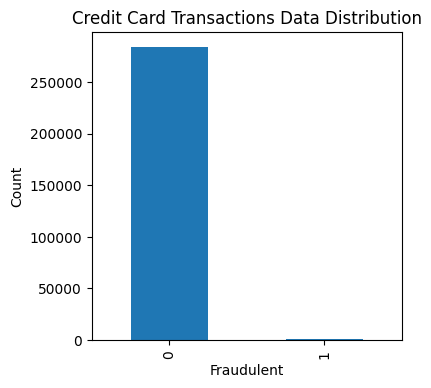

In [41]:
# See distribution of target class
creditcard_df['class'].value_counts().plot.bar(figsize=(4,4), xlabel='Fraudulent', ylabel='Count', title='Credit Card Transactions Data Distribution')
plt.show()

In [42]:
def dataset_analysis(df):
    fraud = df[df['class'] == 1]
    real = df[df['class'] == 0]

    percent_real = (len(real) / (len(real) + len(fraud))) * 100
    percent_fraud = (len(fraud) / (len(real) + len(fraud))) * 100

    print(f'Number of Real Transactions = {len(real)} and the Percentage of Real Transactions = {percent_real:.3f}%')
    print(f'Number of Fraud Transactions = {len(fraud)} and the Percentage of Fraud Transactions = {percent_fraud:.3f}%')

dataset_analysis(creditcard_df)


Number of Real Transactions = 284315 and the Percentage of Real Transactions = 99.827%
Number of Fraud Transactions = 492 and the Percentage of Fraud Transactions = 0.173%


In the below pie chart we are visually representing the distribution of transaction classes (real vs. fraud) in the dataset.

Pie chart Analysis  -

1. The pie chart visually shows the proportion of real transactions compared to fraudulent transactions in the dataset.
2. The larger portion of the pie represents real transactions, while the smaller portion represents fraudulent transactions.
3. Each slice of the pie is labeled with the corresponding class (real or fraud) and its percentage of the total number of transactions.

There are 284,315 real transactions, accounting for approximately 99.827% of the total.

There are 492 fraudulent transactions, accounting for approximately 0.173% of the total.

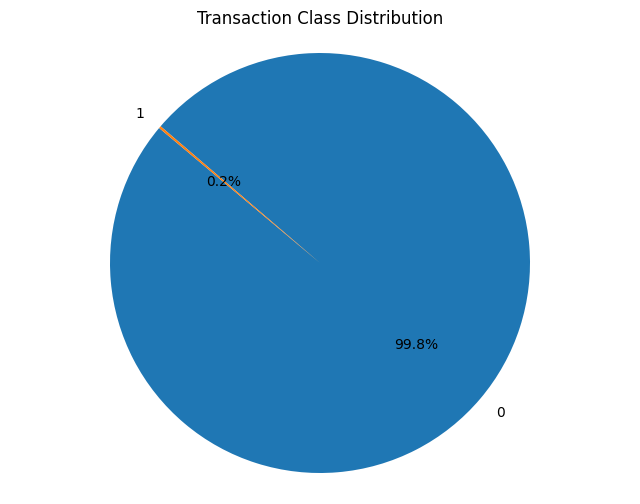

In [43]:
plot_class_distribution(creditcard_df)

The below correlation matrix shows how each feature in the dataset correlates with every other feature.

1. It is useful for understanding the relationships between different features in a dataset.

2. A high positive correlation (close to 1) between two features indicates that they tend to increase or decrease together.

3. A high negative correlation (close to -1) indicates that as one feature increases, the other tends to decrease, and vice versa.

4. A correlation close to 0 suggests that there is little to no linear relationship between the features.

5. By analyzing the heatmap, you can identify patterns and dependencies between features, which can be helpful in feature selection, dimensionality reduction, and understanding the underlying structure of the data.

**From below plot, we can conclude that the features are not correlated.**


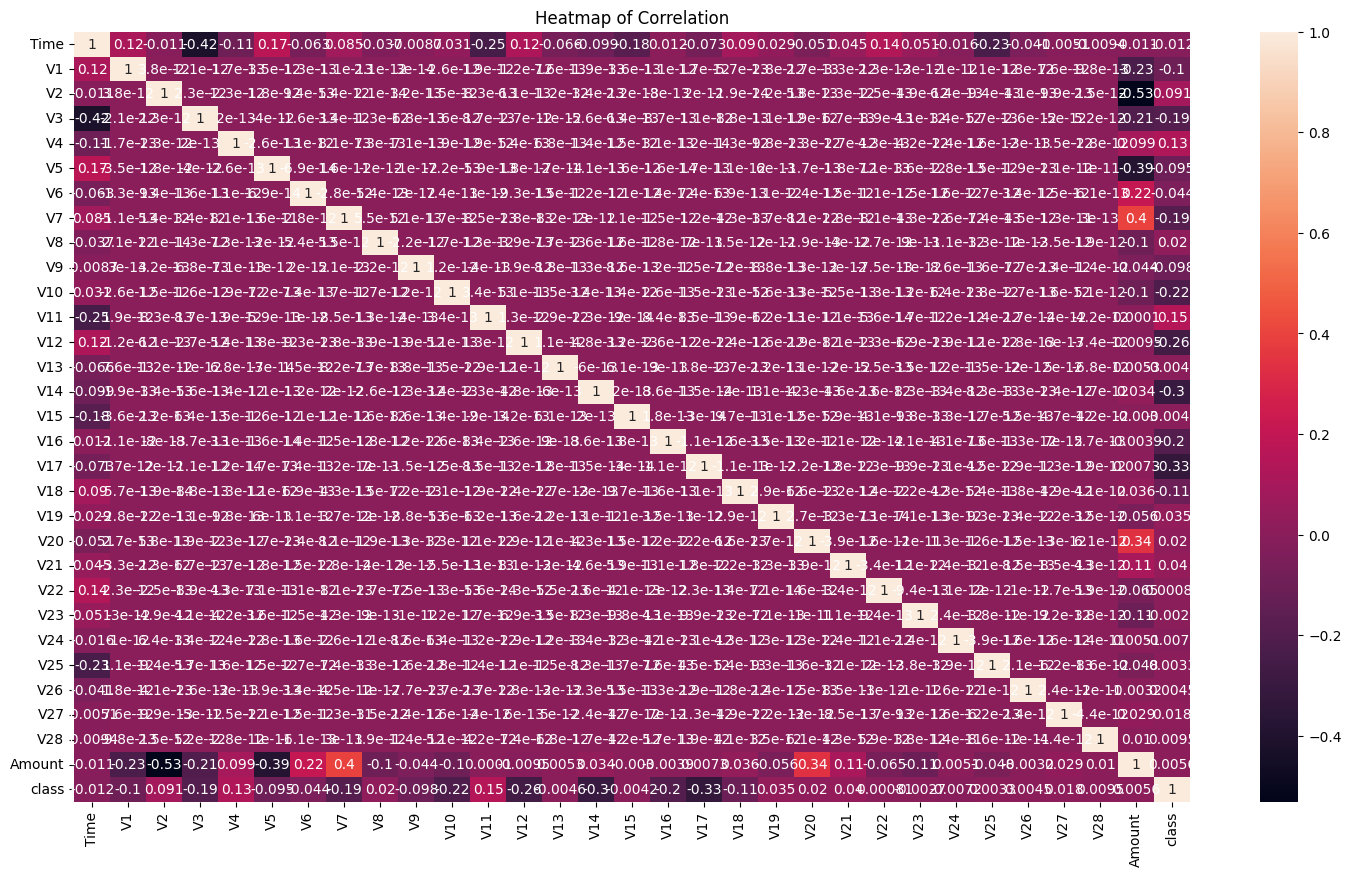

In [44]:
# Plot heatmap of correlations
plot_heatmap_of_correlation(creditcard_df)

Below histograms provide a visual representation of the distribution of transaction amounts for both fraud and real transactions.

1. By comparing the two histograms, you can visually assess whether there are any noticeable differences in the distribution of transaction amounts between fraud and real transactions.

2. Understanding these differences can help in identifying potential patterns or anomalies associated with fraudulent transactions, such as unusually high or low transaction amounts.

3. This analysis can be valuable for developing fraud detection algorithms or understanding the characteristics of fraudulent transactions in the dataset.



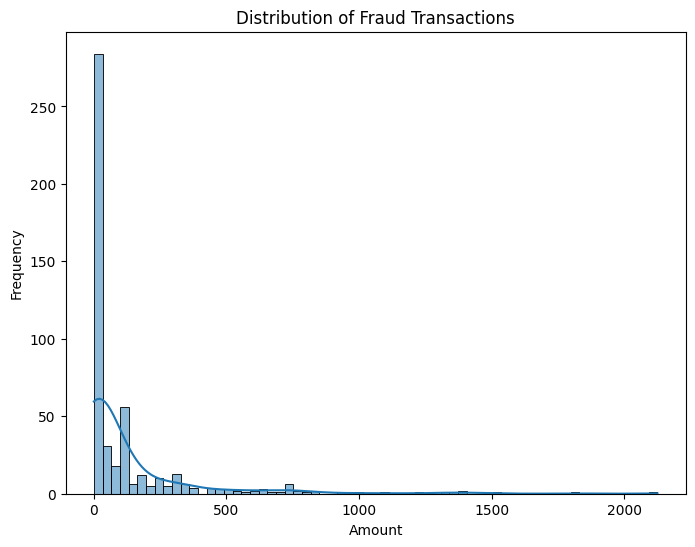

In [45]:
plot_fraud_transaction_histogram(creditcard_df)

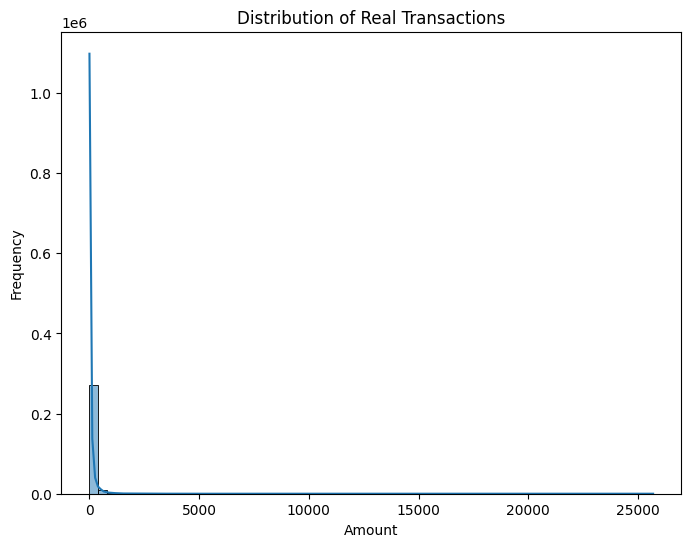

In [46]:
plot_real_transaction_histogram(creditcard_df)

**Above Histogram plot result analysis**

In [47]:
print("Fraud Transaction distribution:")
print(creditcard_df[creditcard_df['class'] == 1]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction:", creditcard_df[creditcard_df['class'] == 1]['Amount'].max())
print("Minimum amount of fraud transaction:", creditcard_df[creditcard_df['class'] == 1]['Amount'].min())

Fraud Transaction distribution:
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction: 2125.87
Minimum amount of fraud transaction: 0.0


The purpose of the below plot is to visualize and compare the distribution of transaction amounts between fraud and real transactions using a boxplot.

1. This plot helps in identifying any significant differences or patterns in the transaction amounts associated with fraudulent activities compared to legitimate transactions.

2. Moreover, Understanding these differences can aid in developing effective fraud detection strategies and models.

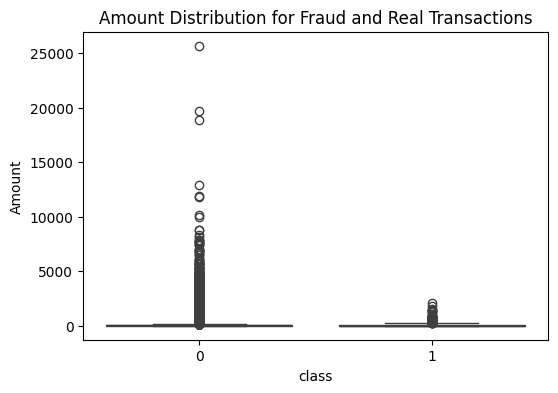

In [48]:
plot_amount_distribution_for_transactions(creditcard_df)

Below plot is to visualize the distribution of transactions over time.

1. The histogram provides insights into the frequency or density of transactions occurring at different points in time.

2. Peaks in the histogram indicate periods of higher transaction activity, while valleys represent periods of lower activity.

3. By examining the shape and pattern of the histogram, you can identify any temporal trends or patterns in transaction activity.

Overall, plot helps in understanding the overall pattern of transaction activity, such as peak hours or periods of increased transaction volume.

<ipython-input-40-ad04cba562f0>:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=120)


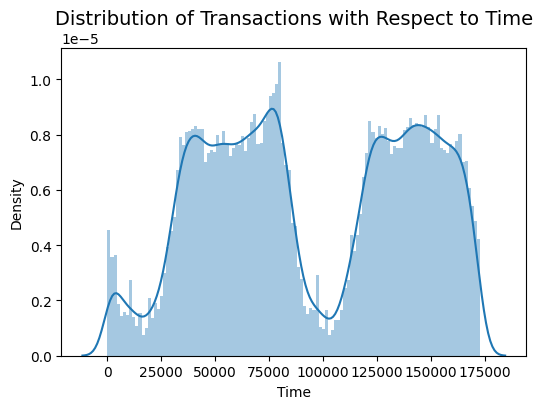

In [49]:
plot_transaction_time_distribution(creditcard_df)

Below plot to visualize the distribution of transaction counts by hour of the day, categorized by transaction class (fraudulent vs. non-fraudulent).

1. The x-axis represents the hours of the day, while the y-axis represents the count of transactions.


2. The bars are color-coded based on the transaction class (fraudulent vs. non-fraudulent), allowing for easy comparison between the two classes.

3. By examining the plot, you can identify any patterns or trends in transaction counts throughout the day and observe if there are specific hours with higher or lower transaction activity.

Overall, plot helps in understanding the temporal patterns of transaction activity and identifying any anomalies or trends associated with specific hours.

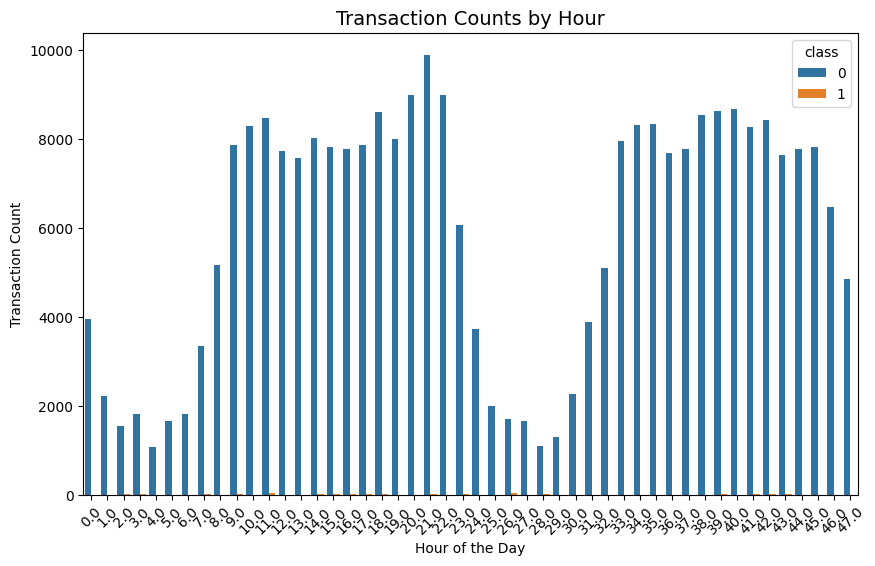

In [50]:
plot_transaction_counts_by_hour(creditcard_df)

Below plot to visualize the distribution of transaction counts by day, categorized by transaction class (fraudulent vs. non-fraudulent)

1. The x-axis represents the days, while the y-axis represents the count of transactions.

2. The bars are color-coded based on the transaction class (fraudulent vs. non-fraudulent), allowing for easy comparison between the two classes.

3. By examining the plot, you can identify any patterns or trends in transaction counts throughout the days and observe if there are specific days with higher or lower transaction activity.

Overall, plot helps in understanding the temporal patterns of transaction activity and identifying any anomalies or trends associated with specific days.

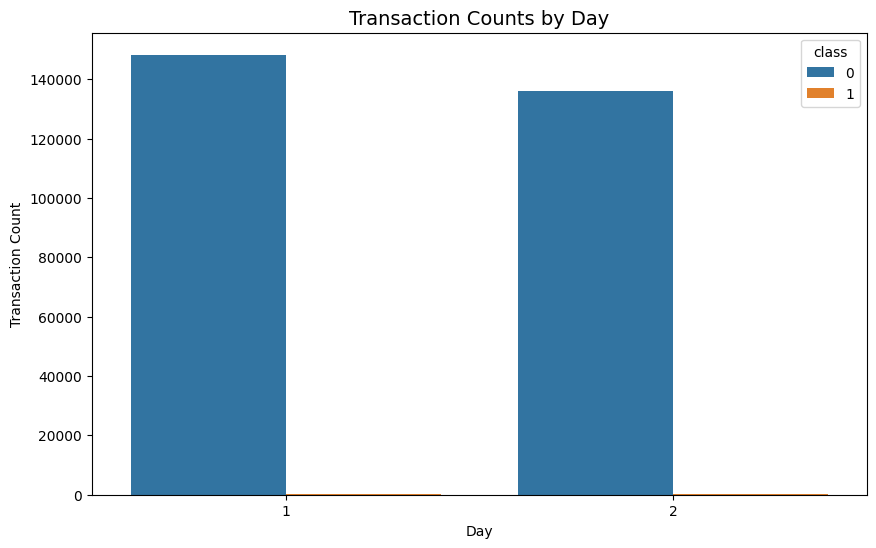

In [51]:
plot_transaction_counts_by_day(creditcard_df)

Below code generates multiple scatter plots to visualize the relationship between transaction amounts and selected features (V1 to V5), categorized by transaction class (fraudulent vs. non-fraudulent).

1. Each scatter plot shows the relationship between transaction amounts ('Amount') and a specific feature (V1 to V5).

2. The x-axis represents the feature values, while the y-axis represents the transaction amounts.Points in the scatter plot represent individual transactions.

3. Each subplot is color-coded based on the transaction class (fraudulent vs. non-fraudulent), with different colors representing different classes.

4. By examining the scatter plots, you can observe how transaction amounts vary concerning different feature values for both fraud and non-fraud transactions. The scatter plots allow you to identify any clusters, outliers, or correlations between transaction amounts and the selected features.

Overall, the plot generated provides valuable insights into the relationship between transaction amounts and selected features, aiding in the analysis and detection of fraudulent transactions.

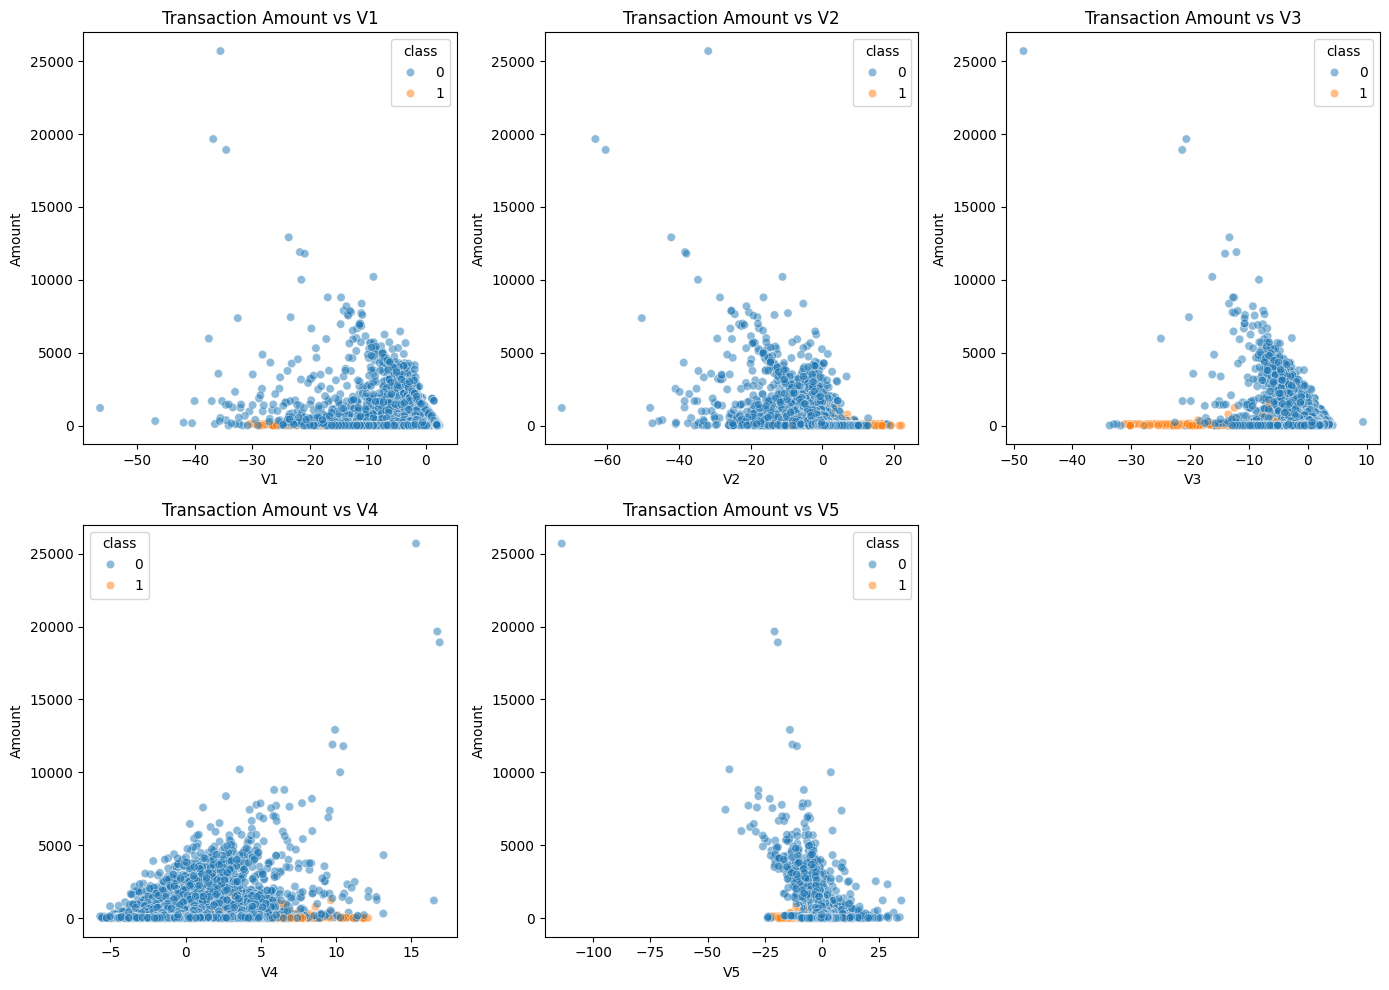

In [52]:
plot_transaction_amount_vs_features(creditcard_df)

Class Imbalance

Whenever there is an issue with a classification problem and the classes are not represented equally, we say that the data is imbalanced. Applying classifiers to the dataset would most likely result in inaccurate predictions for every category. This was seen as a hurdle when attempting to learn from extremely unbalanced data sets.


**SMOTE stands for "Synthetic Minority OverSampling Method."
In this method, synthesis new data from the minority class rather than  replicating existing data.**

SMOTE creates synthetic samples of the minority class by selecting similar instances and creating new synthetic examples along the line segments joining those instances in the feature space.

In [53]:
    X = creditcard_df.drop('class', axis=1)
    y = creditcard_df['class']

    smote = SMOTE(random_state=42)

In [54]:
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_df = X_resampled.copy()
    balanced_df['class'] = y_resampled

**Balanced dataframe after SMOTE**

In [55]:
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hour,Day,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1,0


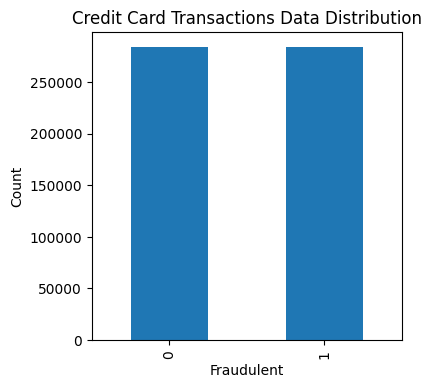

In [56]:
# See distribution of target class
balanced_df['class'].value_counts().plot.bar(figsize=(4,4), xlabel='Fraudulent', ylabel='Count', title='Credit Card Transactions Data Distribution')
plt.show()

**Plots after balancing the datasets**

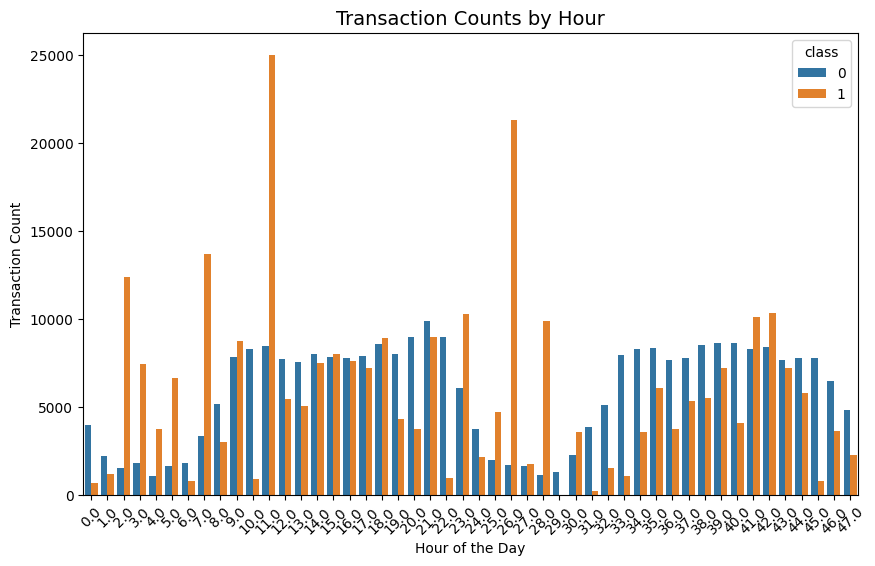

In [57]:
plot_transaction_counts_by_hour(balanced_df)

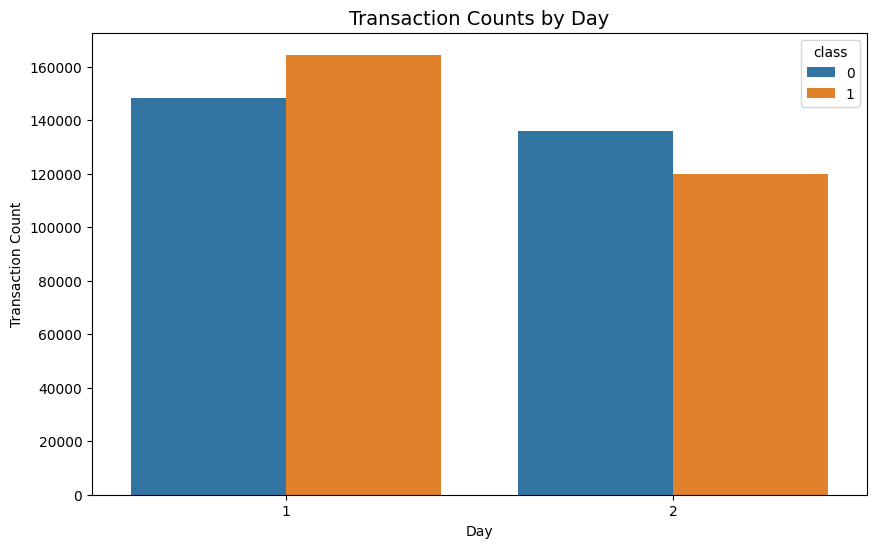

In [58]:
plot_transaction_counts_by_day(balanced_df)

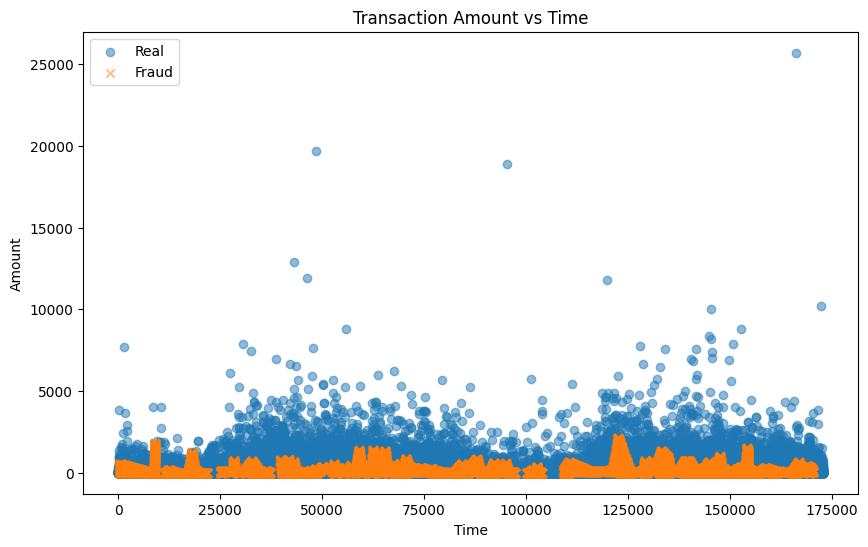

In [59]:
plot_transaction_amount_vs_time(balanced_df)

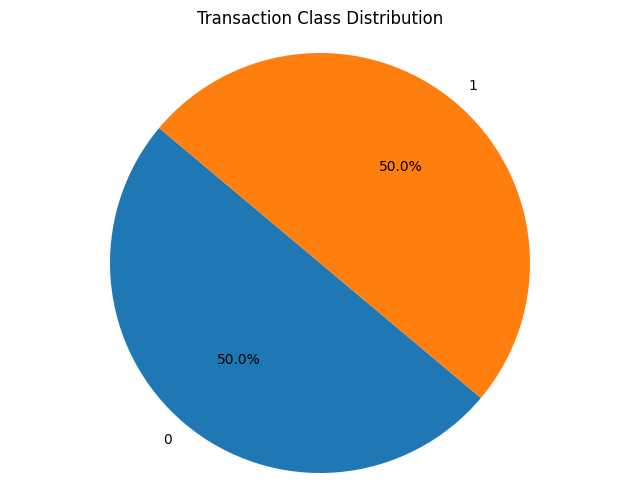

In [60]:
plot_class_distribution(balanced_df)

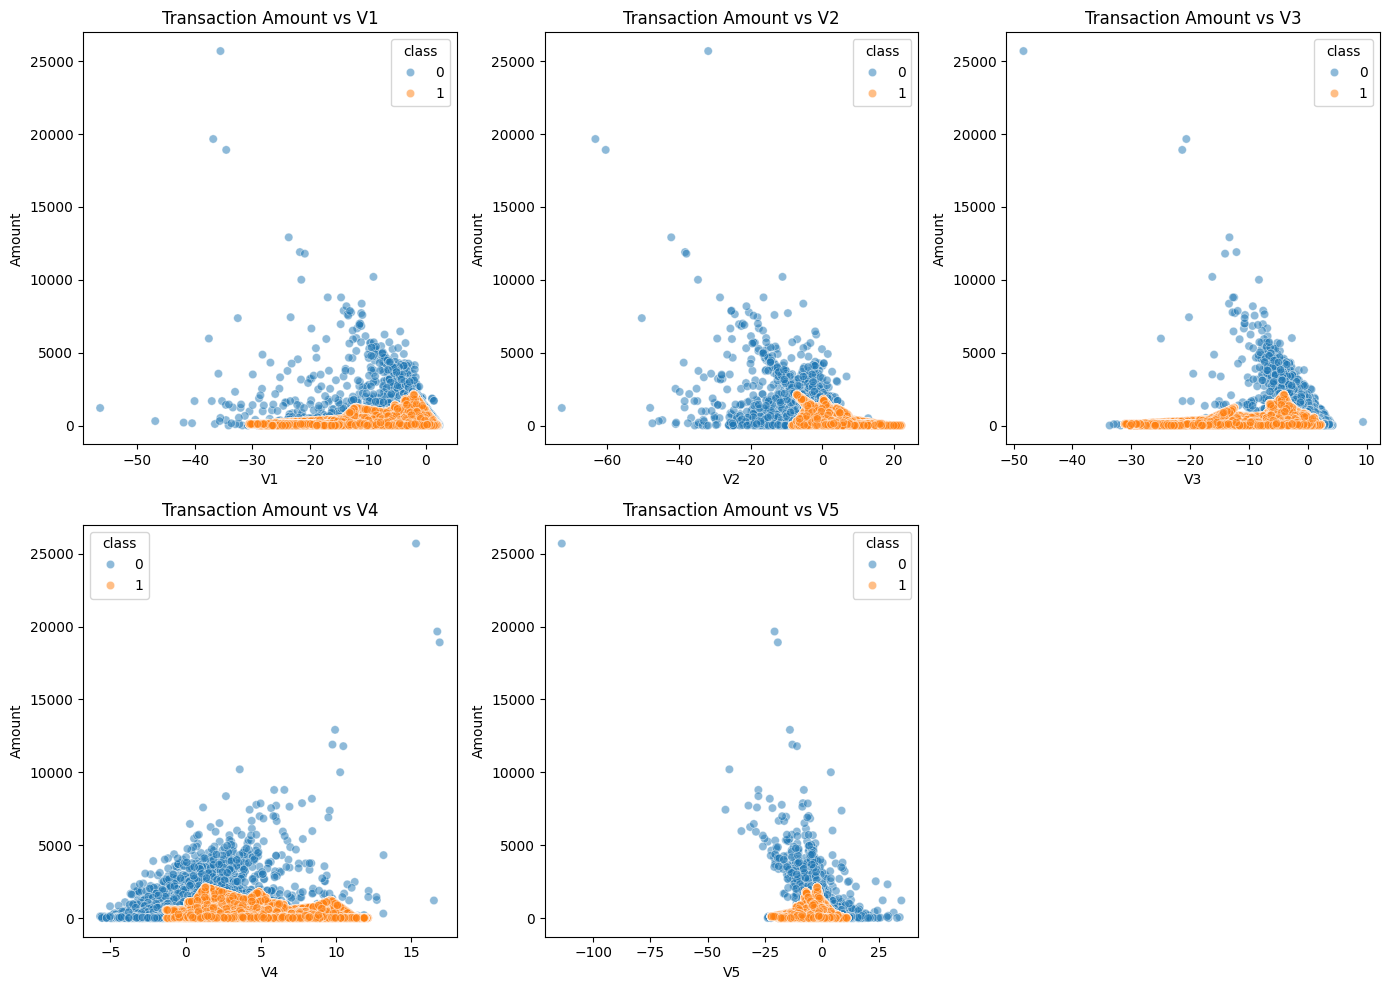

In [61]:
plot_transaction_amount_vs_features(balanced_df)